Set1 has 1245 elements
Set2 has 1311 elements
Set3 has 1289 elements


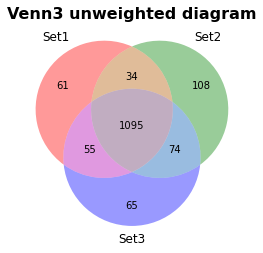

In [1]:
# conda install -c conda-forge matplotlib-venn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn3_unweighted
from time import localtime, strftime


# output 파일 위한 naming: 경로+현재시간
tm = localtime()
ntm = strftime('%Y%m%d_%H%M%S', tm)
address = './outputs/venn3'


# N = 3, Triplicate
path1 = './outputs/20220616_DU145_Global_200ng_60min_7-28%_1_proteinGroups_v1.txt'
path2 = './outputs/20220616_DU145_Global_200ng_60min_7-28%_2_proteinGroups_v1.txt'
path3 = './outputs/20220616_DU145_Global_200ng_60min_7-28%_3_proteinGroups_v1.txt'


# set: 집합 선언
df1 = pd.read_table(filepath_or_buffer=path1)
set1 = set(pd.Series(df1["Protein IDs"]))
print('Set1 has '+str(len(set1))+' elements')

df2 = pd.read_table(filepath_or_buffer=path2)
set2 = set(pd.Series(df2["Protein IDs"]))
print('Set2 has '+str(len(set2))+' elements')

df3 = pd.read_table(filepath_or_buffer=path3)
set3 = set(pd.Series(df3["Protein IDs"]))
print('Set3 has '+str(len(set3))+' elements')


# Visualization 1
'''
venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Venn3 diagram', fontdict=title_font, loc='center')
plt.savefig(address+'_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')
plt.show()
'''


# Visualization 2
venn3_unweighted([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Venn3 unweighted diagram', fontdict=title_font, loc='center')
plt.savefig(address+'_unweighted_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')
plt.show()

In [2]:
# 집합에 해당하는 요소들 불러오기!
# i: intersection (교집합) / d: difference (차집합)
# ex) i123: intersection 1and2and3, i12d3: intersection between 1 and 2 without 3, dif1: only 1

# (1) 1, 2, 3 의 합집합
i123 = set1 & set2 & set3
#print('inter123: '+str(len(i123)))


# (2-1) 1과 2의 합집합
i12 = set1 & set2
#print('inter12: '+str(len(i12)))

# (2-2) 1과 3의 합집합
i13 = set1 & set3
#print('inter13: '+str(len(i13)))

# (2-3) 2와 3의 합집합
i23 = set2 & set3
#print('inter23: '+str(len(i23)))


# (3) 1, 2 에 속하지만 3에 속하지 않는 요소 (3의 여집합)
i12d3 = (set1 & set2) - set3
#print('int12dif3: '+str(len(i12d3)))

# (4) 1, 3 에 속하지만 2에 속하지 않는 요소 (2의 여집합)
i13d2 = (set1 & set3) - set2
#print('int13dif2: '+str(len(i13d2)))

# (5) 2, 3 에 속하지만 1에 속하지 않는 요소 (1의 여집합)
i23d1 = (set2 & set3) - set1
#print('int23dif1: '+str(len(i23d1)))


# (6-1) 1에만 속한 요소 (2와 3에 대한 1의 차집합)
dif1 = set1 - set2 - set3
#print('differ1: '+str(len(dif1)))

# (6-2) 2에만 속한 요소 (1과 3에 대한 2의 차집합)
dif2 = set2 - set1 - set3
#print('differ2: '+str(len(dif2)))
      
# (6-3) 3에만 속한 요소(1과 2에 대한 3의 차집합)
dif3 = set3 - set1 - set2
#print('differ3: '+str(len(dif3)))


# 각 그룹의 요소들 데이터 프레임으로 만들고 csv로 내보내기.
# Merge columns and assembling DataFrame
column_name1 = ['(1AND2AND3)', '(1AND2)', '(1AND3)', '(2AND3)', '(1AND2)-3', '(1AND3)-2', '(2AND3)-1', '1-(2AND3)', '2-(1AND3)', '3-(1AND2)']
column_name2 = [i123, i12, i13, i23, i12d3, i13d2, i23d1, dif1, dif2, dif3]
df = pd.DataFrame({'1AND2AND3': list(i123)})

# 0에서 8까지.
for i in range (9):
    add = pd.DataFrame({column_name1[i+1]: list(column_name2[i+1])})
    df = pd.concat([df, add], axis=1)
    
print('message! >>> All columns are merged')

# tab 으로 구분된 파일 내보내기
df.to_csv(path_or_buf='./outputs/elements'+ntm+'.txt', sep='\t', index=False, encoding='utf-8')
print('message! >>> '+'./outputs/elements'+ntm+'.txt added.')

message! >>> All columns are merged
message! >>> ./outputs_elements20220627_164631.txt added.
